In [4]:
from PIL import Image
import requests
from transformers import AutoProcessor, BlipForQuestionAnswering

model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")
processor = AutoProcessor.from_pretrained("Salesforce/blip-vqa-base")


/home/aseems/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


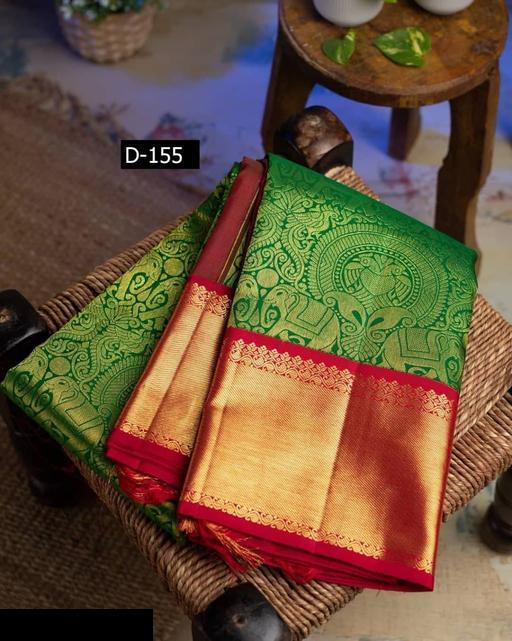

In [5]:
image=Image.open("train_images/007458.jpg")
image.show()

In [12]:



# training
text = "border"
label = "same as saree"
inputs = processor(images=image, text=text, return_tensors="pt")
labels = processor(text=label, return_tensors="pt").input_ids

inputs["labels"] = labels
outputs = model(**inputs)
print(outputs)
loss = outputs.loss
loss.backward()

# inference
text = "border?"
inputs = processor(images=image, text=text, return_tensors="pt")
inputs["labels"] = inputs['input_ids']
outputs = model(**inputs)
print(outputs)
print(processor.decode(outputs[0], skip_special_tokens=True))

BlipTextVisionModelOutput(loss=tensor(4.8187, grad_fn=<MeanBackward0>), image_embeds=tensor([[[-0.2267, -0.1982,  0.3170,  ..., -0.8490,  1.0534, -0.7438],
         [-0.1417, -0.7832, -0.1716,  ..., -1.0595,  0.7175, -0.5406],
         [-0.2021, -0.8540,  0.1796,  ..., -0.9053,  0.6811,  0.5835],
         ...,
         [-0.5295, -0.3841,  1.1111,  ..., -0.1933, -0.1954, -0.3745],
         [-0.8497,  0.6140,  0.1890,  ..., -0.8441,  0.4787, -0.0303],
         [ 0.4584, -0.0450, -0.1002,  ..., -0.1916, -0.0971, -1.0931]]],
       grad_fn=<NativeLayerNormBackward0>), last_hidden_state=tensor([[[-0.2267, -0.1982,  0.3170,  ..., -0.8490,  1.0534, -0.7438],
         [-0.1417, -0.7832, -0.1716,  ..., -1.0595,  0.7175, -0.5406],
         [-0.2021, -0.8540,  0.1796,  ..., -0.9053,  0.6811,  0.5835],
         ...,
         [-0.5295, -0.3841,  1.1111,  ..., -0.1933, -0.1954, -0.3745],
         [-0.8497,  0.6140,  0.1890,  ..., -0.8441,  0.4787, -0.0303],
         [ 0.4584, -0.0450, -0.1002,  ...,

TypeError: argument 'ids': 'float' object cannot be converted to 'Sequence'